# VAE

In [12]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
# from torchvision import datasets, transforms
import dataset
import mainmodel
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import OneClassSVM
from sklearn.metrics import roc_curve
import modelVAE

## 学習データ作成

In [13]:

Dataset = dataset.dataset("Obrid_AE", "data")
Dataset.concat_data("sample_data",500)
Dataset = dataset.dataset("Obrid_AE", "test")
print("----------------------")
Dataset.concat_data("sample_test",100)
print("----------------------")
data = Dataset.read_savedata("sample_test")
print(data.shape[0])
print("----------------------")
# data, test_data , anomaly_data= Dataset.read_traindata("sample_data", "sample_test", 2000, 1024, 1)
data, ori_data, test_data , anomaly_data= Dataset.read_Auged_traindata("/Users/yukihorikawa/Desktop/LAB_LAST/AutoEncoder/AutoEncoder/SensorData/1224NewSensorData/1224Data_train/train.npy", "/Users/yukihorikawa/Desktop/LAB_LAST/AutoEncoder/AutoEncoder/SensorData/1224NewSensorData/1224Data_anomaly/anomaly.npy", 1000, 256, 1, readType=False)


(500, 256)
(500, 256)
----------------------
(100, 256)
(100, 256)
----------------------
(100, 256)
100
----------------------
(500, 256)
(100, 256)
1148 0
rate 0.9
data.shape[0]: 500
rate 450
TrainData (500, 1024, 1, 1, 256)
TestData (50, 256)
ÄnomalyDta (100, 256)


## モデル学習

In [14]:
#netよう
z_dim = 8
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = modelVAE.VAE_cnn_drop_net(z_dim, device).to(device)
# optimizer = optim.Adam(model.parameters(), lr=0.001)
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-3, weight_decay = 1e-5)
input_data = torch.from_numpy(data.astype(np.float32)).clone()
ori_data = torch.from_numpy(ori_data.astype(np.float32)).clone()
input_test_data = torch.from_numpy(test_data.astype(np.float32)).clone()

model.train()
loss_list = []
cnt = 0
# input_data = input_data[0:300]
for epoch in input_data:
    losses = []
    cnt += 1
    for x in epoch:
        x = x.to(device) # データをGPUにのせる
        loss, z, y = model(x, device) # 損失関数の値 loss 、潜在ベクトル z 、再構築画像 y を出力
        model.zero_grad() # モデルの勾配を初期化
        loss.backward() # モデル内のパラメータの勾配を計算
        optimizer.step() # 最適化を実行
        losses.append(loss.cpu().detach().numpy()) # ミニバッチの損失を記録
    loss_list.append(np.average(losses)) # バッチ全体の損失を登録
    print("EPOCH: {} loss: {}".format(cnt, np.average(losses)))
    # for x in input_test_data:
    #     KL_loss, reconstruction_loss = model.loss(x)
    #     loss = KL_loss + reconstruction_loss
    #     losses_val.append(loss.cpu().detach().numpy())

    # print('EPOCH:%d, Train Lower Bound:%lf, (%lf, %lf), Valid Lower Bound:%lf' %
    #     (epoch+1, np.average(losses), np.average(KL_losses), np.average(reconstruction_losses)))

EPOCH: 1 loss: 104.45596313476562
EPOCH: 2 loss: 42.295310974121094
EPOCH: 3 loss: 17.639999389648438
EPOCH: 4 loss: 14.906953811645508
EPOCH: 5 loss: 17.272226333618164
EPOCH: 6 loss: 19.136337280273438
EPOCH: 7 loss: 18.149272918701172
EPOCH: 8 loss: 5.676648139953613
EPOCH: 9 loss: 24.624683380126953
EPOCH: 10 loss: 13.259416580200195
EPOCH: 11 loss: 15.81513500213623
EPOCH: 12 loss: 14.611966133117676
EPOCH: 13 loss: 12.78822135925293
EPOCH: 14 loss: 24.35598373413086
EPOCH: 15 loss: 6.015010356903076
EPOCH: 16 loss: 6.514988899230957
EPOCH: 17 loss: 24.68099594116211
EPOCH: 18 loss: 15.944951057434082
EPOCH: 19 loss: 20.706039428710938
EPOCH: 20 loss: 8.935341835021973
EPOCH: 21 loss: 16.30900001525879
EPOCH: 22 loss: 18.125133514404297
EPOCH: 23 loss: 9.372559547424316
EPOCH: 24 loss: 11.802127838134766
EPOCH: 25 loss: 16.75074005126953
EPOCH: 26 loss: 24.397533416748047
EPOCH: 27 loss: 10.96108627319336
EPOCH: 28 loss: 7.571964263916016
EPOCH: 29 loss: 26.910255432128906
EPOCH: 

In [15]:
# z_dim = 8
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# model = modelVAE.VAE_cnn(z_dim, device).to(device)
# # optimizer = optim.Adam(model.parameters(), lr=0.001)
# optimizer = torch.optim.Adam(model.parameters(), lr = 1e-3, weight_decay = 1e-5)
# input_data = torch.from_numpy(data.astype(np.float32)).clone()
# input_test_data = torch.from_numpy(test_data.astype(np.float32)).clone()
# for epoch in input_data:
#     losses = []
#     KL_losses = []
#     reconstruction_losses = []
#     model.train()
#     for x in epoch:
#         x = x.to(device)
#         model.zero_grad()
#         KL_loss, reconstruction_loss = model.loss(x)  # lossの各項の計算
#         loss = KL_loss + reconstruction_loss  # 和を取ってlossとする
#         loss.backward()
#         optimizer.step()
#         losses.append(loss.detach().numpy())
#         KL_losses.append(KL_loss.detach().numpy())
#         reconstruction_losses.append(reconstruction_loss.detach().numpy())

#     losses_val = []
#     model.eval()
#     # for x in input_test_data:
#     #     KL_loss, reconstruction_loss = model.loss(x)
#     #     loss = KL_loss + reconstruction_loss
#     #     losses_val.append(loss.cpu().detach().numpy())

#     # print('EPOCH:%d, Train Lower Bound:%lf, (%lf, %lf), Valid Lower Bound:%lf' %
#     #     (epoch+1, np.average(losses), np.average(KL_losses), np.average(reconstruction_losses)))

## モデルの保存

In [16]:
folder_name = "tyuudenkou"
model_name = "VAE"
ModelEdit = mainmodel.Modeledit(folder_name,model_name)
ModelEdit.save_model(model) 

## 確認だよーん

tensor([[[0.1830, 0.1830, 0.1830, 0.1830, 0.1830, 0.1830, 0.1830, 0.1830,
          0.1830, 0.1830, 0.1830, 0.1830, 0.1830, 0.1830, 0.1830, 0.1830,
          0.1830, 0.1830, 0.1830, 0.1830, 0.1830, 0.1830, 0.1830, 0.1830,
          0.1830, 0.1830, 0.1830, 0.1830, 0.1830, 0.1830, 0.1830, 0.1830,
          0.1830, 0.1830, 0.1830, 0.1830, 0.1830, 0.1830, 0.1830, 0.1830,
          0.1830, 0.1830, 0.1830, 0.1830, 0.1830, 0.1830, 0.1830, 0.1830,
          0.1830, 0.1830, 0.1830, 0.1830, 0.1830, 0.1830, 0.1830, 0.1830,
          0.1830, 0.1830, 0.1830, 0.1830, 0.1830, 0.1830, 0.1830, 0.1830,
          0.1830, 0.1830, 0.1830, 0.1830, 0.1830, 0.1830, 0.1830, 0.1830,
          0.1830, 0.1830, 0.1830, 0.1830, 0.1830, 0.1830, 0.1830, 0.1830,
          0.1830, 0.1830, 0.1830, 0.1830, 0.1830, 0.1830, 0.1830, 0.1830,
          0.1830, 0.1830, 0.1830, 0.1830, 0.1830, 0.1830, 0.1830, 0.1830,
          0.1830, 0.1830, 0.1830, 0.1830, 0.1830, 0.1830, 0.1830, 0.1830,
          0.1830, 0.1830, 0.1830, 0.18

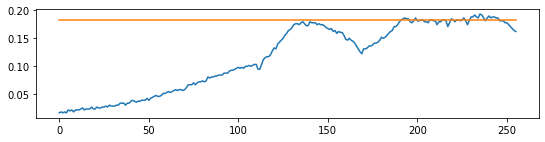

normal:17.279636323451996
anomaly


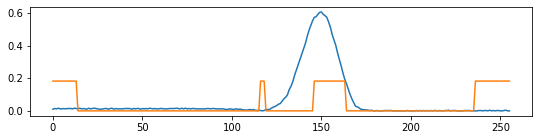

anomarly:18.87182626235576
anomaly
<class 'torch.Tensor'>


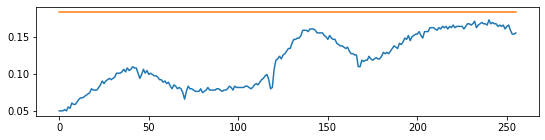

normal:16.736760266125202
anomaly


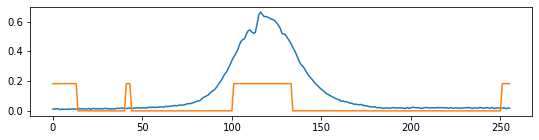

anomarly:28.163948736153543
anomaly
<class 'torch.Tensor'>


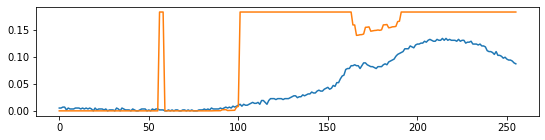

normal:16.280626846383534
anomaly


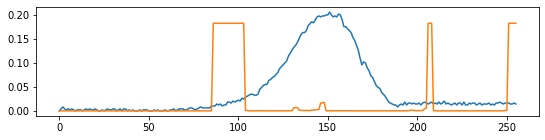

anomarly:14.789122882764786
anomaly
<class 'torch.Tensor'>


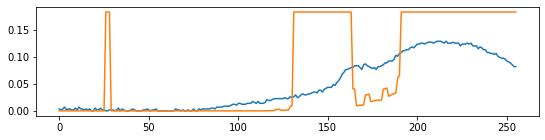

normal:11.887344405755446
anomaly


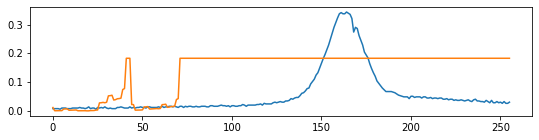

anomarly:26.111427113879472
anomaly
<class 'torch.Tensor'>


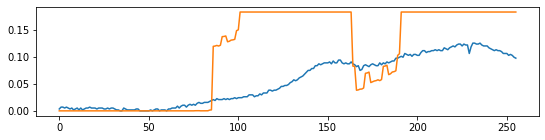

normal:15.068382118043896
anomaly


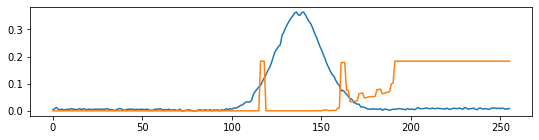

anomarly:24.62620204442424
anomaly
Finish


In [17]:
# num = 5
data0 =  torch.from_numpy((test_data[0]).astype(np.float32)).clone()
data0 = data0[np.newaxis, np.newaxis, :]
loss, z, recon = model(data0, device)
# recon, _ = model(data0)
recon = recon.detach()
print(recon)

for i in range(anomaly_data.shape[0]):
    if i % 10 == 0:
        try:
            data0 =  torch.from_numpy((test_data[i]).astype(np.float32)).clone()
            test0 =  torch.from_numpy((anomaly_data[i]).astype(np.float32)).clone()
            print(type(data0))
            plt.figure(figsize=(9, 2))
            # data = data0.numpy()
            input_data = data0[np.newaxis, np.newaxis, :]
            # recon,_ = model(input_data)
            loss, z, recon = model(input_data, device)
            recon = recon.detach().numpy()
            plt.plot(data0.numpy())
            plt.plot(recon.flatten())
            plt.show()
            
            anomalypoint=sum(abs(recon.flatten()-data0.numpy()))
            print("normal:"+str(anomalypoint))
            if(anomalypoint>10):
                print("anomaly")
                
            plt.figure(figsize=(9, 2))
            # data = test0.numpy()
            input_data = test0[np.newaxis, np.newaxis, :]
            # recon,_ = model(input_data)
            loss, z, recon = model(input_data, device)
            recon = recon.detach().numpy()
            plt.plot(test0.numpy(),label="testdata")
            plt.plot(recon.flatten(),label="recondata")
            plt.show()
            
            anomalypoint=sum(abs(recon.flatten()-test0.numpy()))
            print("anomarly:"+str(anomalypoint))
            if(anomalypoint>10):
                print("anomaly")
        except IndexError: 
            print("Finish")
            break